<a href="https://colab.research.google.com/github/nralibera/PAr_135/blob/main/fault_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#pip install --upgrade google-api-python-client

# Current stable release for CPU and GPU
!pip install tensorflow


In [5]:
import numpy as np
import random as rd
from tqdm import tqdm

## **I. Data construction for model training:**
We want two arrays: the first `matrix_data` containing the matrices 3D with shape=(n,m,p) and the second `label` containing the faults (permanent or intermittent without distinction) which correspond to the matrices 1D with shape=(p). For example, the matrix `matrix_data(:,:,15)` corresponds to the fault of class `label(15)`.

In [4]:
#Linking drive with the notebook if you use google colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [6]:
 #Load Data

data=np.load("/Users/nanto/OneDrive/Bureau/ECL/Machine Learning/PAr_135/Files/trainset.npz")

x_train = np.moveaxis(data['x_train'],2,0)
y_train = data["y_train"]

x_test = np.moveaxis(data['x_test'],2,0)
y_test = data["y_test"]  


In [10]:
print(x_train.shape)

(131264, 55, 108)


## **II. Convolutional Neural Network (CNN):**
In this first attempt, we use a neural network especially a Convolutional Neural Network (CNN). This idea comes from the fact that the input matrix `matrix_data` reminds a matrix of a white and black image. Thus, CNN can be a model to handle the problem. 

 

In [12]:

import tensorflow as tf 
import matplotlib.pyplot as plt

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
#assert len(tf.config.list_physical_devices('GPU')) > 0

[ 31044  44886   8037 113848]


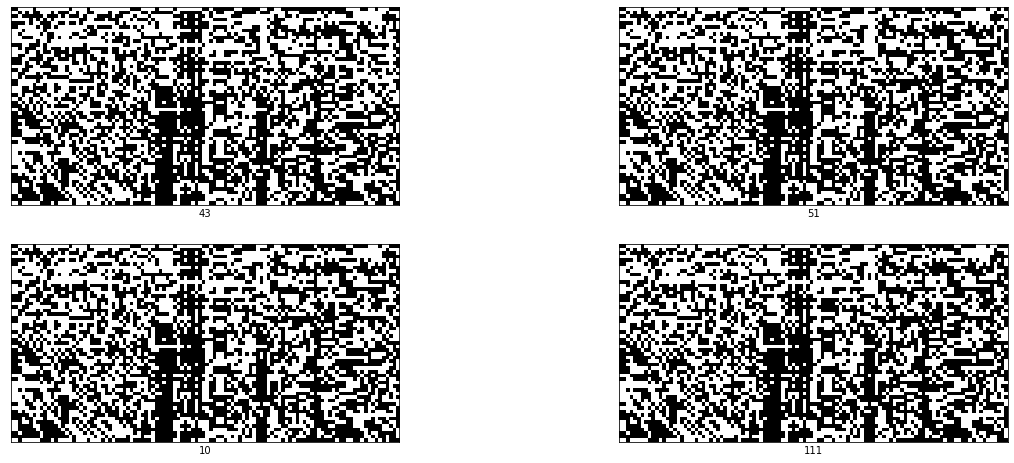

In [13]:
plt.figure(figsize=(20,8))
random_inds = np.random.choice(x_train.shape[0],4)
print(random_inds)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(x_train[image_ind,:,:]), cmap=plt.cm.binary)
    plt.xlabel(y_train[image_ind])

#print((x_train[:,:,77535]== x_train[:,:,57107]).all())

In [14]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(300, activation= 'relu'),
      

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(121, activation= 'softmax')
      
  ])
  return fc_model

model = build_fc_model()

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 1000
EPOCHS = 3

model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/3
4102/4102 [==============================] - 43s 10ms/step - loss: 4.1020 - accuracy: 0.1017
Epoch 2/3
2948/4102 [====================>.........] - ETA: 10s - loss: 2.7366 - accuracy: 0.3201